**import useful libraries**

In [1]:
import pandas as pd #for loading dataframe
import numpy as np #for numeric computations
import seaborn as sb #high level visualization
import matplotlib.pyplot as plt # for visualization
from pylab import rcParams #setting default size of my visualizations
from collections import Counter # for counting levels of variables 
from IPython.display import display_html #to display in html formats
pd.options.display.max_rows = None #set number of rows to display
pd.options.display.max_columns = None #set number of columns to display
sb.set_palette('Set1') #default color palette to use
rcParams['figure.figsize'] = 8,8 #default visualization size
%matplotlib inline #print visualizations in notebook

UsageError: unrecognized arguments: #print visualizations in notebook


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**load data**

In [4]:
trainwine = pd.read_csv('/content/drive/My Drive/Kaggle/train.csv')
print('Train data successfully loaded...!!!')
testwine = pd.read_csv('/content/drive/My Drive/Kaggle/test.csv')
print('Test data successfully loaded...!!!')

Train data successfully loaded...!!!
Test data successfully loaded...!!!


In [5]:
# !ls '/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/'

In [6]:
trainwine = pd.read_csv('/content/drive/My Drive/Kaggle/train.csv')
print('Train data is successfully loaded...!!!')
print('Train data contains {} observations and {} feature columns.'.format(trainwine.shape[0],trainwine.shape[1]))
print('+*+'*35)
testwine = pd.read_csv('/content/drive/My Drive/Kaggle/test.csv')
TW = testwine.copy()
print('Test data is successfully loaded...!!!')
print('Test data contains {} observations and {} feature columns.'.format(testwine.shape[0],testwine.shape[1]))

Train data is successfully loaded...!!!
Train data contains 175000 observations and 14 feature columns.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
Test data is successfully loaded...!!!
Test data contains 83210 observations and 15 feature columns.


**display first 5 rows  of train data**

In [7]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos,32027
1,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier,71079
2,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac,32440
3,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs,124405
4,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline,33649


In [8]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,id
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin,0
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne,1
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden,2
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs,3
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle,4


### Data Cleaning

**set id as data index**

In [9]:
trainwine.set_index('id',inplace=True)
testwine.set_index('id',inplace=True)

In [10]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,
32027,Portugal,This is a fine rich balanced wine. It has ripe...,Vila Santa Reserva,88.870874,20.0,Alentejano,NaN,NaN,NaN,NaN,NaN,PORTUGUESE RED,J. Portugal Ramos
71079,France,"A solid, chunky wine, with a structure that is...",NaN,88.041695,28.0,Bordeaux,Lalande de Pomerol,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Tour Grand Colombier
32440,France,"This is powerful and concentrated, with the hi...",NaN,94.085021,130.0,Bordeaux,Saint-Émilion,NaN,NaN,NaN,NaN,BORDEAUX-STYLE RED BLEND,Château Figeac
124405,US,"Rich, ripe and oaky, this Petite Sirah charms ...",Thompson Vineyard,89.869797,34.0,California,Santa Barbara County,Central Coast,NaN,NaN,Jaffurs 2010 Thompson Vineyard Petite Sirah (S...,PETITE SIRAH,Jaffurs
33649,US,This wine is a unique in the state blend and f...,McKinley Springs Vineyard,89.017651,24.0,Washington,Horse Heaven Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Syncline 2016 McKinley Springs Vineyard Rosé (...,ROSé,Syncline


In [11]:
testwine.head()

,index,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
id,,,,,,,,,,,,,,
0,41855,US,"Sweet new oak stands out, giving this Cabernet...",3D,95.036469,NaN,California,St. Helena,Napa,NaN,NaN,Salvestrin 2007 3D Cabernet Sauvignon (St. Hel...,CABERNET SAUVIGNON,Salvestrin
1,10328,France,Charming raspberry aromas intertwine with scen...,Heluicum,90.966405,NaN,Rhône Valley,Collines Rhôdaniennes,NaN,NaN,NaN,NaN,SYRAH,Les Vins de Vienne
2,60094,US,"Ripe blackberry, leather and soy show on the n...",Estate,88.964358,NaN,California,Santa Ynez Valley,Central Coast,Matt Kettmann,@mattkettmann,Brave & Maiden 2013 Estate Cabernet Franc (San...,CABERNET FRANC,Brave & Maiden
3,48333,US,White flowers and wild anise give this a crisp...,NaN,89.960356,NaN,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Les Voleurs 2013 Chardonnay (Sonoma Coast),CHARDONNAY,Les Voleurs
4,14498,US,Pinot Gris has been making inroads in Washingt...,NaN,88.075501,NaN,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Chateau Ste. Michelle 2015 Pinot Gris (Columbi...,PINOT GRIS,Chateau Ste. Michelle


In [12]:
print(trainwine.info())
print('+-*+'*10)
print('+-*+'*10)
print(testwine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175000 entries, 32027 to 91621
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                174953 non-null  object 
 1   description            175000 non-null  object 
 2   designation            122734 non-null  object 
 3   points                 175000 non-null  float64
 4   price                  175000 non-null  float64
 5   province               174953 non-null  object 
 6   region_1               146466 non-null  object 
 7   region_2               75394 non-null   object 
 8   taster_name            65509 non-null   object 
 9   taster_twitter_handle  62190 non-null   object 
 10  title                  82189 non-null   object 
 11  variety                174999 non-null  object 
 12  winery                 175000 non-null  object 
dtypes: float64(2), object(11)
memory usage: 18.7+ MB
None
+-*++-*++-*++-*++-*++-*++-*++-*+

In [13]:
# let's convert points data type from float to integer
trainwine['points'] = trainwine['points'].astype(int)
testwine['points'] = testwine['points'].astype(int)

In [14]:
# Let make sure that all the categorical features are all lower cases to avoid duplicates
for i in trainwine.columns:
  if trainwine[i].dtype == 'O':
    trainwine[i] = trainwine[i].str.lower()
    
for i in testwine.columns:
  if testwine[i].dtype == 'O':
    testwine[i] = testwine[i].str.lower()    

**remove columns which we will not need, like title,taster_twitter_handle and taster_name**

In [15]:
p = ['title','taster_twitter_handle','taster_name']
q = ['index','title','taster_twitter_handle','taster_name','price']
trainwine.drop(columns=p, axis =1,inplace=True)
testwine.drop(columns=q, axis =1,inplace=True)

In [16]:
trainwine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
id,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,NaN,NaN,portuguese red,j. portugal ramos
71079,france,"a solid, chunky wine, with a structure that is...",NaN,88,28.0,bordeaux,lalande de pomerol,NaN,bordeaux-style red blend,château tour grand colombier
32440,france,"this is powerful and concentrated, with the hi...",NaN,94,130.0,bordeaux,saint-émilion,NaN,bordeaux-style red blend,château figeac
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,central coast,petite sirah,jaffurs
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,columbia valley,rosé,syncline


In [17]:
testwine.head()

,country,description,designation,points,province,region_1,region_2,variety,winery
id,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,napa,cabernet sauvignon,salvestrin
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,NaN,syrah,les vins de vienne
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,central coast,cabernet franc,brave & maiden
3,us,white flowers and wild anise give this a crisp...,NaN,89,california,sonoma coast,sonoma,chardonnay,les voleurs
4,us,pinot gris has been making inroads in washingt...,NaN,88,washington,columbia valley (wa),columbia valley,pinot gris,chateau ste. michelle


**Let's create bins for our points**

In [18]:
trainwine['points'].describe()

count    175000.000000
mean         87.581606
std           3.195285
min          79.000000
25%          85.000000
50%          87.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [19]:
Counter(trainwine['points'])

Counter({79: 423,
         80: 1231,
         81: 2676,
         82: 4911,
         83: 8353,
         84: 12338,
         85: 15840,
         86: 20665,
         87: 22729,
         88: 18585,
         89: 17616,
         90: 16374,
         91: 12508,
         92: 9466,
         93: 5866,
         94: 3183,
         95: 1332,
         96: 521,
         97: 243,
         98: 86,
         99: 37,
         100: 17})

In [20]:
# #Transform method taking points as param
# def transform_points(points):
#     if points < 84:
#         return 1
#     elif points >= 84 and points < 89:
#         return 2 
#     elif points >= 89 and points < 95:
#         return 3 
#     elif points >= 95 and points < 99:
#         return 4 
#     else:
#         return 5

In [21]:
# #Applying transform method and assigning result to new column "points_cat"
# trainwine = trainwine.assign(points_cat = trainwine['points'].apply(transform_points))
# testwine = testwine.assign(points_cat = testwine['points'].apply(transform_points))

**check for missing values in data**

In [22]:
print('The missing values in the training data are as shown below:')
print('+*+'*20)
trainwine.isnull().sum().sort_values(ascending=False)

The missing values in the training data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


region_2       99606
designation    52266
region_1       28534
province          47
country           47
variety            1
winery             0
price              0
points             0
description        0
dtype: int64

In [23]:
print('The missing values in the test data are as shown below:')
print('+*+'*20)
testwine.isnull().sum().sort_values(ascending=False)

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


region_2       47608
designation    24824
region_1       13883
province          17
country           17
winery             0
variety            0
points             0
description        0
dtype: int64

Since we have information about the province,region_1 and designation and country then we will drop the region_2 since it contains a lot of missing values.

In [24]:
trainwine.drop('region_2',axis=1,inplace=True)
testwine.drop('region_2',axis=1,inplace=True)

In [25]:
for i in trainwine.columns:
  if trainwine[i].isnull().sum() >= 1:
    trainwine[i].fillna('missing',inplace = True)

print('The missing values in the test data are as shown below:')
print('+*+'*20)
trainwine.isnull().sum().sort_values(ascending=False)    

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


winery         0
variety        0
region_1       0
province       0
price          0
points         0
designation    0
description    0
country        0
dtype: int64

In [26]:
for i in testwine.columns:
  if testwine[i].isnull().sum() >= 1:
    testwine[i].fillna('missing',inplace = True)

print('The missing values in the test data are as shown below:')
print('+*+'*20)
testwine.isnull().sum().sort_values(ascending=False)    

The missing values in the test data are as shown below:
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


winery         0
variety        0
region_1       0
province       0
points         0
designation    0
description    0
country        0
dtype: int64

We will fill missing values in country, province and region_1 with missing since the other columns contain information.

In [27]:
print(trainwine.shape)
print(testwine.shape)

(175000, 9)
(83210, 8)


**We will first check for duplicates and drop them**

We consider the description and points assigned by the reviewers to be extremely important for our prediction, hence, we will remove all the duplicate data points in these columns and further drop all the missing values in these features.

In [28]:
# it is obvious from the dataframe below that our data contains duplicates in the description given by reviewers
trainwine[trainwine.duplicated('description', keep = False)].sort_values('description').head(5)

,country,description,designation,points,price,province,region_1,variety,winery
id,,,,,,,,,
94355,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,85,24.0,niederösterreich,missing,grüner veltliner,winzer krems
96052,austria,"""chremisa,"" the ancient name of krems, is comm...",edition chremisa sandgrube 13,84,24.0,niederösterreich,missing,grüner veltliner,winzer krems
147725,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa
62345,chile,$11. opens with a highly perfumed bouquet of l...,estate reserve,84,11.0,maipo valley,missing,chardonnay,la playa
68876,us,). savory on the nose with scents of pressed a...,reserve,85,16.0,new york,finger lakes,riesling,fulkerson


In [29]:
# # now we will drop the duplicated descriptions
# trainwine = trainwine.drop_duplicates('description')
# # let's check for the size of the data after removong duplicates
# print(trainwine.shape)

### Exploratory Data Analysis

We will explore the overall distribution of the data and attempt to answer some basic questions regarding the data which include:
> * the relationship between the price and points of wine.
> * the country with the most expensive and cheapest wine.
> * the country with the best and worst wine by points on average.
> * the country with the most expensive and cheapest wine on average.
> * the price by variety to know if some varieties are expensive.
> * the price by variety to know if some varieties are of great quality.

**Relationship between the price and points of wine.**

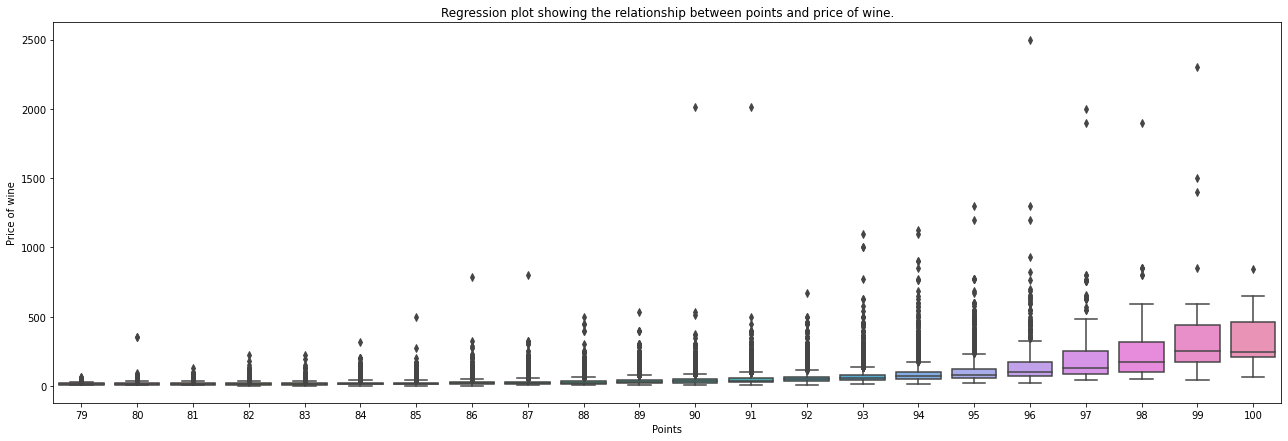

+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+
There exist some study rise in the price of wine as the allocated points by the reviewers increase. This is evident in the plot above and below.
+=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=++=+


In [30]:
plt.figure(figsize=(22,7))
sb.boxplot(data=trainwine,x='points',y='price')
plt.xlabel('Points')
plt.ylabel('Price of wine')
plt.title('Regression plot showing the relationship between points and price of wine.')
plt.show()
print('+=+'*48)
print('There exist some study rise in the price of wine as the allocated points by the reviewers increase. This is evident in the plot above and below.')
print('+=+'*48)

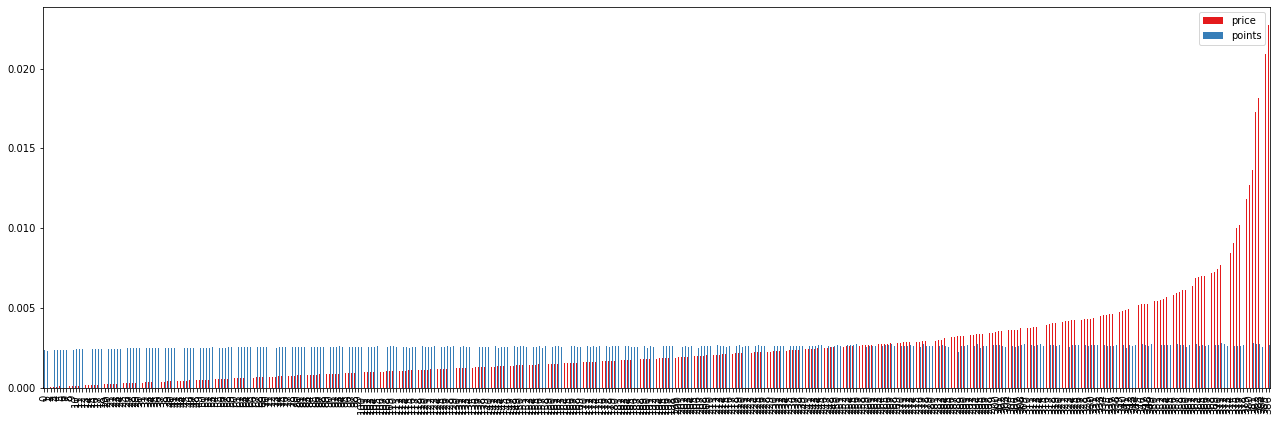

In [31]:
wag = trainwine.groupby('price',as_index=False)['points'].mean()
wag.div(wag.sum(0).astype(float)).plot(kind='bar',stacked=False,figsize=(22,7))


In [32]:
# function to display the dataframe
def show_df(data, cat, col):
    avg_df = data.groupby(cat, as_index=False)[col].mean().sort_values(by = col, ascending = False)
    # check for NA
    avg_df = avg_df.dropna(axis = 0)
    # display top 10
    df1 = avg_df.head(10)
    # display bottom 10
    df2 = avg_df.tail(10)
    
    html_str=''
    for df in [df1,df2]:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True) 

In [33]:
def cat_plot(df, cat, col,color1,color2):
    avg = df.groupby(cat, as_index = False)[col].mean()
    avg.set_index(cat, inplace = True)
    best = avg.nlargest(10, col)
    worst = avg.nsmallest(10, col)
    fig, ax = plt.subplots(1,2,figsize = (18,6))
    # Reverse so the plot looks nicer; the "best" will be on top
    best = best.iloc[::-1]
    best.plot(kind = "barh", ax= ax[0], color=color1,fontsize = 14, title = "Best " + cat + " by " + col,legend=False)
    worst.plot(kind = "barh", ax=ax[1], color=color2,fontsize = 14, title = "Worst " + cat + " by " + col,legend=False)
    ax[0].title.set_size(16) # Set title size
    ax[1].title.set_size(16)
    plt.tight_layout()
    plt.show()

**Country with the best and worst wine, by points on average.**

According to the reviewers, England has the best wines followed by Austria then Germany. It is surprising to see France rank 6th after Switzerland. It is also suprising not to see US feature in the first 10 countries with the best wines. On the other hand, South Korea and Slovakia aren't great at wine making compared to other countries. 


In [34]:
show_df(trainwine,'country','points')

,country,points
13,england,91.148148
3,austria,89.219213
16,germany,88.711864
7,canada,88.483766
41,switzerland,88.428571
14,france,88.170762
30,morocco,88.166667
21,italy,88.029759
19,india,88.000000
28,missing,88.000000


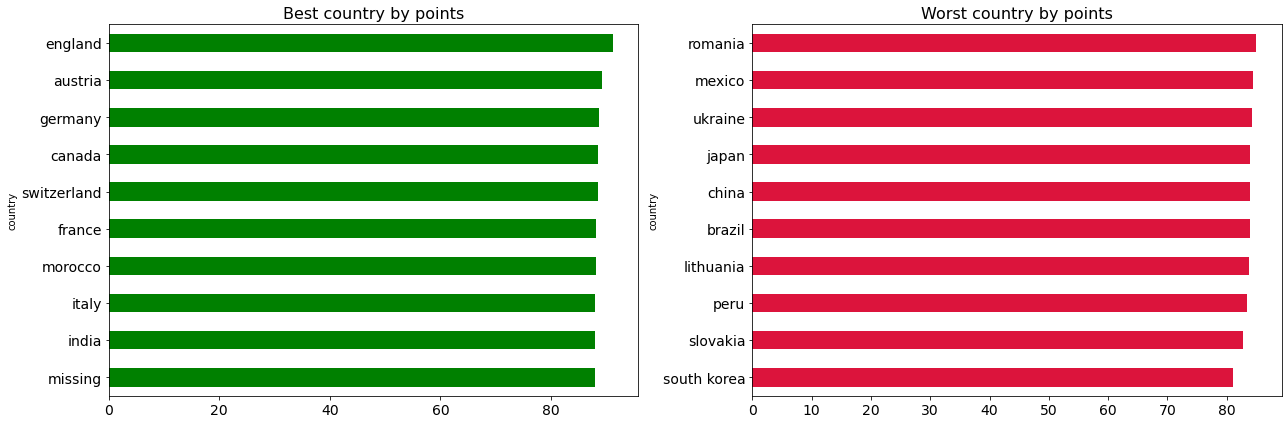

In [35]:
cat_plot(trainwine,'country','points','green','crimson')

**Country with the most expensive and cheapest wine on average.**

Ok, so I thought wines from France and the States were the best- turns out they're just the most expensive! So we can already see, expensive does not equal better, when it comes to wine (and probably most things in life!). Similarly, the cheapeast wine doesn't mean it's necessarily the worst wine.

In [36]:
show_df(trainwine,'country','price')

,country,price
41,switzerland,62.714286
13,england,51.574074
18,hungary,43.901961
14,france,43.367316
16,germany,40.280000
21,italy,38.804166
45,us,35.153079
7,canada,35.123377
20,israel,32.243466
2,australia,32.185269


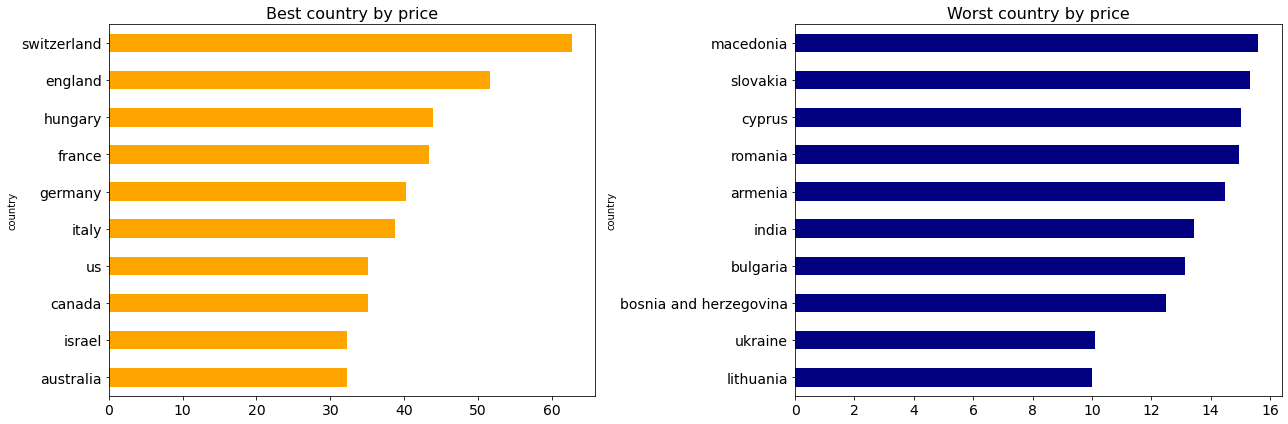

In [37]:
cat_plot(trainwine,'country','price','orange','navy')

**price by variety to know if some varieties are expensive.**

The most expensive winery is château pétrus and it is located in France with an average price of $\$2000.0$. Surprisingly, 8 out of the 10 most expensive wineries are all located France. Only screaming eagle in the US and masseto in Italy could make it into the first 10 most expensive wineries' list. The cheapest winery is broke ass and it is also located in Argentina with an average price of $\$4.0$. 

In [38]:
show_df(trainwine,'winery','price')

,winery,price
4325,château pétrus,2000.000000
5929,domaine du comte liger-belair,1812.500000
3310,château d'yquem,800.000000
4021,château latour,691.166667
1368,blair,610.142857
3766,château haut-brion,598.600000
10755,masseto,587.500000
4034,château laville haut-brion,580.000000
3964,château lafite rothschild,542.500000
13917,screaming eagle,500.000000


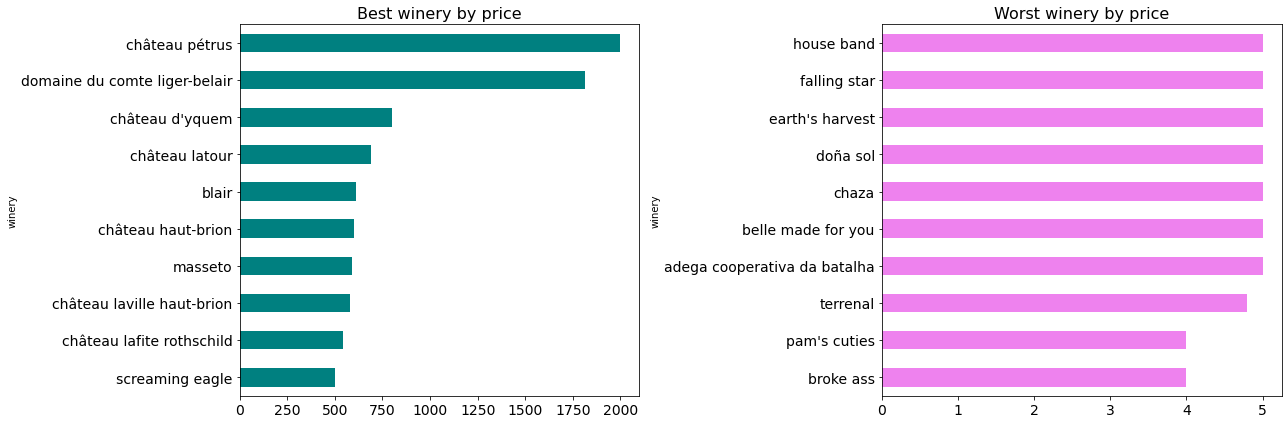

In [39]:
cat_plot(trainwine,'winery','price','teal','violet')

### Feature Engineering

In [40]:
# Description length for the train data
trainwine["desc_len"] = trainwine['description'].apply(len)
trainwine["num_words_desc"] = trainwine['description'].map(lambda x: len(x.split()))

testwine["desc_len"] = testwine['description'].apply(len)
testwine["num_words_desc"] = testwine['description'].map(lambda x: len(x.split()))

It is very obvious from the below plot that the greater the points awarded by the reviewer, the greater the description length.

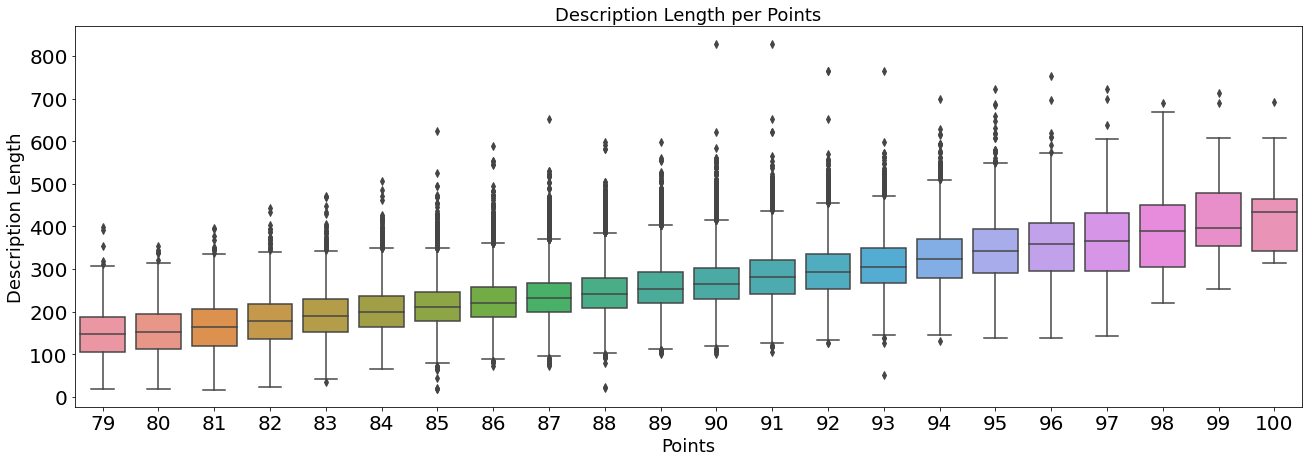

In [41]:
fig, ax = plt.subplots(figsize=(22,7))
sb.boxplot(x='points', y='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Points', size=18) 
ax.set_ylabel('Description Length', fontsize = 18) # Y label
ax.set_xlabel('Points', fontsize = 18) # X label
plt.show()

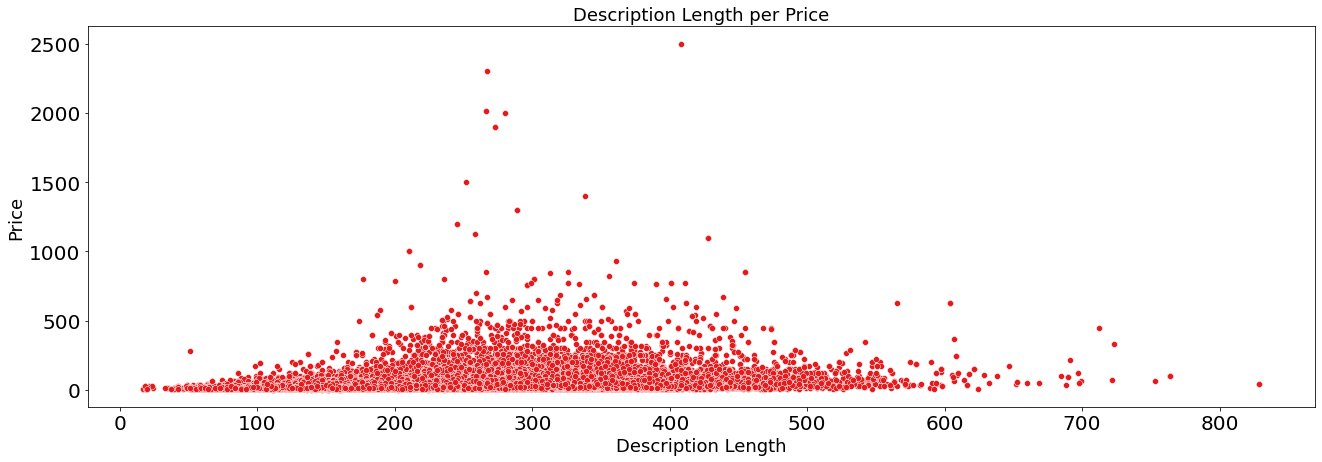

In [42]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='price', x='desc_len', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('Description Length per Price', size=18) 
ax.set_xlabel('Description Length', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

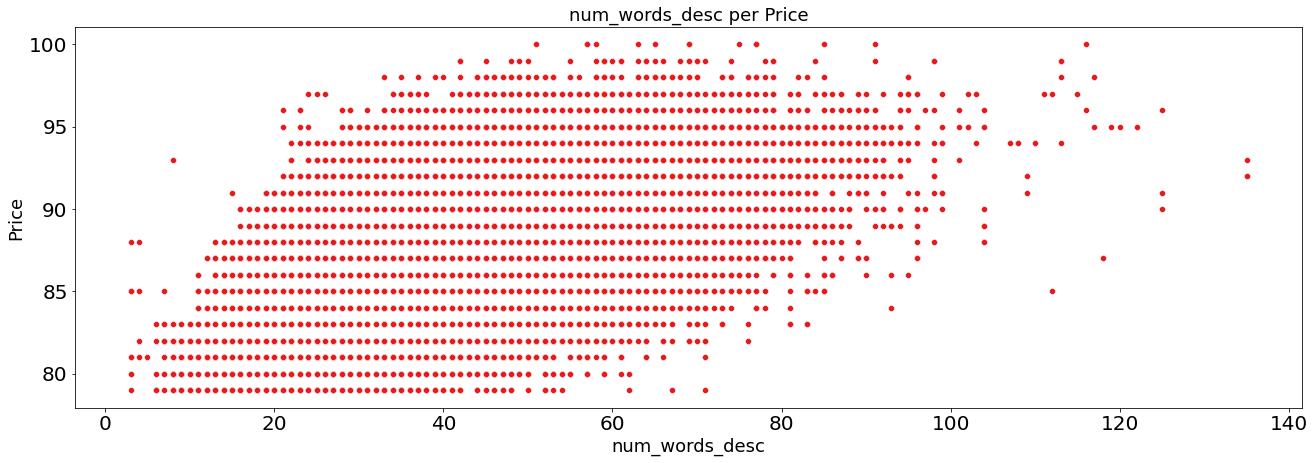

In [43]:
fig, ax = plt.subplots(figsize=(22,7))
sb.scatterplot(y='points', x='num_words_desc', data=trainwine)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
ax.set_title('num_words_desc per Price', size=18) 
ax.set_xlabel('num_words_desc', fontsize = 18) # Y label
ax.set_ylabel('Price', fontsize = 18) # X label
plt.show()

### Model Building

In [44]:
!pip install tensorflow==2.0.0-beta0

     |████████████████████████████████| 87.9MB 35kB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 501kB 43.5MB/s 
     |████████████████████████████████| 3.1MB 39.7MB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [45]:
!pip install catboost

     |████████████████████████████████| 66.2MB 47kB/s 


In [46]:
!pip install tensorflow

In [47]:
import os
import math
import tensorflow.keras
import itertools
from tqdm import tqdm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV,RidgeCV
from lightgbm import LGBMRegressor

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

**Split data into train and test**

In [48]:
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,desc_len,num_words_desc
id,,,,,,,,,,,
32027,portugal,this is a fine rich balanced wine. it has ripe...,vila santa reserva,88,20.0,alentejano,missing,portuguese red,j. portugal ramos,267,46
71079,france,"a solid, chunky wine, with a structure that is...",missing,88,28.0,bordeaux,lalande de pomerol,bordeaux-style red blend,château tour grand colombier,225,41
32440,france,"this is powerful and concentrated, with the hi...",missing,94,130.0,bordeaux,saint-émilion,bordeaux-style red blend,château figeac,199,33
124405,us,"rich, ripe and oaky, this petite sirah charms ...",thompson vineyard,89,34.0,california,santa barbara county,petite sirah,jaffurs,187,31
33649,us,this wine is a unique in the state blend and f...,mckinley springs vineyard,89,24.0,washington,horse heaven hills,rosé,syncline,290,51


In [49]:
testwine.head()

,country,description,designation,points,province,region_1,variety,winery,desc_len,num_words_desc
id,,,,,,,,,,
0,us,"sweet new oak stands out, giving this cabernet...",3d,95,california,st. helena,cabernet sauvignon,salvestrin,342,57
1,france,charming raspberry aromas intertwine with scen...,heluicum,90,rhône valley,collines rhôdaniennes,syrah,les vins de vienne,227,37
2,us,"ripe blackberry, leather and soy show on the n...",estate,88,california,santa ynez valley,cabernet franc,brave & maiden,300,55
3,us,white flowers and wild anise give this a crisp...,missing,89,california,sonoma coast,chardonnay,les voleurs,196,32
4,us,pinot gris has been making inroads in washingt...,missing,88,washington,columbia valley (wa),pinot gris,chateau ste. michelle,201,35


In [50]:
# Split data into train and test
train_size = int(len(trainwine) * .8)

print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(trainwine) - train_size))

Train size: 140000
Test size: 35000


In [51]:
trainwine.dtypes

country            object
description        object
designation        object
points              int64
price             float64
province           object
region_1           object
variety            object
winery             object
desc_len            int64
num_words_desc      int64
dtype: object

**Encoding categorical features**

We have to encode the underlisted columns into numeric values:
- ['country', 'designation', 'province','region_1', 'variety', 'winery']

In [52]:
# encoding the categorical features
catfeat = ['country', 'designation', 'province','region_1', 'variety', 'winery']
encoder_dict = {}
for i in catfeat:
  t = trainwine.groupby([i])['price'].mean().sort_values(ascending=True).index
  encoder_dict[i] = {k:i for i,k in enumerate(t,0)}

for i in catfeat:
  trainwine[i] = trainwine[i].map(encoder_dict[i])
  testwine[i] = testwine[i].map(encoder_dict[i])

In [53]:
trainwine.head()

,country,description,designation,points,price,province,region_1,variety,winery,desc_len,num_words_desc
id,,,,,,,,,,,
32027,28,this is a fine rich balanced wine. it has ripe...,11450,88,20.0,226,713,403,5680,267,46
71079,42,"a solid, chunky wine, with a structure that is...",18992,88,28.0,428,901,663,10051,225,41
32440,42,"this is powerful and concentrated, with the hi...",18992,94,130.0,428,1190,663,16802,199,33
124405,39,"rich, ripe and oaky, this petite sirah charms ...",24176,89,34.0,411,828,519,12947,187,31
33649,39,this wine is a unique in the state blend and f...,19017,89,24.0,364,878,214,10261,290,51


In [54]:
testwine.fillna(testwine.median(),inplace=True)

In [55]:
trainset = trainwine.sample(frac=.8,random_state=10)
testset = trainwine.drop(index=trainset.index)
print(trainset.shape)
print(testset.shape)

(140000, 11)
(18744, 11)


In [56]:
ytrain = trainset['price']
xtrain = trainset.drop(['price','description','points'],axis=1)
ytest = testset['price']
xtest = testset.drop(['price','description','points'],axis=1)

print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(140000, 8)
(140000,)
(18744, 8)
(18744,)


**Unscaled Models**

In [57]:
# LinearRegression
lin = LinearRegression(n_jobs=-1)
lin = lin.fit(xtrain,ytrain)
linpred = lin.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,linpred))
print('+*+'*20)
print('The RMSE for the linear regression model is {}.'.format(rmse))
print('+*+'*20)
pd.DataFrame({'actual_price':ytest,'predicted_price':linpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the linear regression model is 27.60796417188037.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,28.400406
132328,17.0,14.718445
146382,40.0,40.067391
109813,13.0,18.038776
12842,33.0,29.941785


In [58]:
# RandomForest
rand = RandomForestRegressor(max_features=None,n_estimators=800,max_depth=29,random_state=10,n_jobs=-1)#{10 :md=29: 11.25,ne=800}
rand = rand.fit(xtrain,ytrain)
randpred = rand.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,randpred))
print('+*+'*20)
print('The RMSE for the random forest model is {}.'.format(rmse))
print('+*+'*20)
pd.DataFrame({'actual_price':ytest,'predicted_price':randpred}).head(10)

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the random forest model is 11.90977761038724.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,18.069487
132328,17.0,18.317091
146382,40.0,30.589811
109813,13.0,14.096328
12842,33.0,31.166174
28612,80.0,80.084573
92494,45.0,50.746463
142910,24.0,21.336622
64291,7.0,7.003750


In [59]:
test = testwine.drop(['description','points'],axis=1)
testpred = rand.predict(test)

In [60]:
rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/FinalRandomForestRegressor.csv',index=False)
rand_sub.shape

(83210, 2)

In [61]:
importance = list(rand.feature_importances_)
feat_importance = [(i,round(importance,2)) for i, importance in zip(xtrain.columns,importance)]
feat_importance

[('country', 0.01),
 ('designation', 0.48),
 ('province', 0.01),
 ('region_1', 0.1),
 ('variety', 0.02),
 ('winery', 0.32),
 ('desc_len', 0.04),
 ('num_words_desc', 0.03)]

In [62]:
# catboost
model = CatBoostRegressor(
        iterations=100, learning_rate=0.1,
        depth=6, l2_leaf_reg=3,
        loss_function='RMSE',
        eval_metric='RMSE',
        random_seed=10)
    
model.fit(xtrain, ytrain,cat_features=catfeat,plot=True,verbose = 20,early_stopping_rounds=10)
y_pred = model.predict(xtest)

rmse = np.sqrt(mean_squared_error(ytest,y_pred))
print('+*+'*24)
print('The RMSE for the cat boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':y_pred}).head()


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 37.5047290	total: 98.4ms	remaining: 9.74s
20:	learn: 31.7703983	total: 753ms	remaining: 2.83s
40:	learn: 30.7980061	total: 1.36s	remaining: 1.95s
60:	learn: 30.3050575	total: 1.95s	remaining: 1.25s
80:	learn: 29.9702297	total: 2.55s	remaining: 599ms
99:	learn: 29.7017375	total: 3.13s	remaining: 0us
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the cat boosting regressor model is 27.02080809074005.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,18.000644
132328,17.0,18.621458
146382,40.0,30.645738
109813,13.0,14.436663
12842,33.0,42.452200


In [63]:
# test = testwine.drop(['description'],axis=1)
# testpred = rand.predict(test)

In [64]:
# rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/Revised_RandomForest_Subm.csv',index=False)
# rand_sub.head()

In [65]:
# Gradient Boosting
grad = GradientBoostingRegressor(random_state=40)#40
grad = grad.fit(xtrain,ytrain)
gradpred = grad.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,gradpred))
print('+*+'*24)
print('The RMSE for the gardient boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':gradpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the gardient boosting regressor model is 14.595419652112035.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,20.586043
132328,17.0,17.123390
146382,40.0,34.058820
109813,13.0,19.145538
12842,33.0,25.647459


In [66]:
# test = testwine.drop(['description','points_cat'],axis=1)
# testpred = grad.predict(test)

In [67]:
# rand_sub = pd.DataFrame({'id':TW['id'],'price':testpred})
# rand_sub.to_csv('/content/drive/My Drive/Colab Notebooks/AMMI/ammi-bootcamp-kaggle-competition/gradboost_Subm.csv',index=False)
# rand_sub.head()

In [68]:
# Light Gradient Boosting
lgb = LGBMRegressor(learning_rate=0.03,n_estimators=200,max_depth=5,random_state=70,n_jos =-1)
lgb = lgb.fit(xtrain,ytrain)
lgbpred = lgb.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,lgbpred))
print('+*+'*24)
print('The RMSE for the light gardient boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':lgbpred}).head()

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the light gardient boosting regressor model is 16.054683951418458.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,20.644477
132328,17.0,18.164561
146382,40.0,33.212012
109813,13.0,16.966357
12842,33.0,25.519678


In [69]:
# DecisionTreeRegressor 
dct = DecisionTreeRegressor(random_state=111)
dct = dct.fit(xtrain,ytrain)
dctpred = dct.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest,dctpred))
print('+*+'*24)
print('The RMSE for the categorical boosting regressor model is {}.'.format(rmse))
print('+*+'*24)
pd.DataFrame({'actual_price':ytest,'predicted_price':dctpred}).head(10)

+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+
The RMSE for the categorical boosting regressor model is 13.739163711560199.
+*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*++*+


,actual_price,predicted_price
id,,
132767,17.0,17.0
132328,17.0,13.0
146382,40.0,40.0
109813,13.0,13.0
12842,33.0,34.0
28612,80.0,80.0
92494,45.0,45.0
142910,24.0,25.0
64291,7.0,7.0


**Neural network**

In [70]:
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(xtrain.shape[1],)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=64, activation='relu'))
network.add(layers.Dense(units=128, activation='relu'))
network.add(layers.Dense(units=256, activation='relu'))
network.add(layers.Dense(units=512, activation='relu'))
network.add(layers.Dense(units=1024, activation='relu'))
# Add fully connected layer with no activation function
network.add(layers.Dense(units=1))

# Compile neural network
network.compile(loss='mse', # Mean squared error
                optimizer='adam', # Optimization algorithm
                metrics=['mse']) # Mean squared error

# Train neural network
history = network.fit(xtrain, # Features
                      ytrain, # Target vector
                      epochs=10, # Number of epochs
                      verbose=1, # No output
                      batch_size=1000, # Number of observations per batch
                      validation_data=(xtest, ytest)) # Data for evaluation


Train on 140000 samples, validate on 18744 samples
Epoch 1/10
140000/140000 [==============================] - 7s 49us/sample - loss: 133841.7668 - mse: 133841.7656 - val_loss: 730.1154 - val_mse: 730.1154
Epoch 2/10
140000/140000 [==============================] - 7s 47us/sample - loss: 938.4512 - mse: 938.4512 - val_loss: 713.6256 - val_mse: 713.6255
Epoch 3/10
140000/140000 [==============================] - 7s 47us/sample - loss: 920.7888 - mse: 920.7887 - val_loss: 691.7837 - val_mse: 691.7837
Epoch 4/10
140000/140000 [==============================] - 7s 47us/sample - loss: 907.7214 - mse: 907.7213 - val_loss: 702.8708 - val_mse: 702.8708
Epoch 5/10
140000/140000 [==============================] - 7s 47us/sample - loss: 896.1206 - mse: 896.1208 - val_loss: 697.4364 - val_mse: 697.4364
Epoch 6/10
140000/140000 [==============================] - 7s 47us/sample - loss: 877.7785 - mse: 877.7785 - val_loss: 650.9177 - val_mse: 650.9177
Epoch 7/10
140000/140000 [=======================

In [71]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

In [72]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = xtrain.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               1152      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 257       
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________


In [73]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [74]:
NN_model.fit(xtrain,ytrain, epochs=10, batch_size=32, validation_data=(xtest, ytest), callbacks=callbacks_list)

Train on 140000 samples, validate on 18744 samples
Epoch 1/10
139968/140000 [============================>.] - ETA: 0s - loss: 1055.2694 - mean_squared_error: 1055.2706
Epoch 00001: val_loss improved from inf to 971.02386, saving model to Weights-001--971.02386.hdf5
140000/140000 [==============================] - 12s 89us/sample - loss: 1055.2241 - mean_squared_error: 1055.2252 - val_loss: 971.0239 - val_mean_squared_error: 971.0240
Epoch 2/10
139936/140000 [============================>.] - ETA: 0s - loss: 950.0648 - mean_squared_error: 950.0654
Epoch 00002: val_loss improved from 971.02386 to 690.24687, saving model to Weights-002--690.24687.hdf5
140000/140000 [==============================] - 12s 88us/sample - loss: 949.7495 - mean_squared_error: 949.7501 - val_loss: 690.2469 - val_mean_squared_error: 690.2470
Epoch 3/10
139872/140000 [============================>.] - ETA: 0s - loss: 923.3312 - mean_squared_error: 923.3302
Epoch 00003: val_loss did not improve from 690.24687
1400

In [76]:
# Load wights file of the best model :
# wights_file = 'Weights-478--18738.19831.hdf5' # choose the best checkpoint 
# NN_model.load_weights(wights_file) # load it
# NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])


In [77]:
def make_submission(prediction, sub_name):
  my_submission = pd.DataFrame({'Id':TW['id'],'price':prediction})
  my_submission.to_csv('{}.csv'.format(sub_name),index=False)
  print('A submission file has been made')

In [78]:
predictions = NN_model.predict(test)
make_submission(predictions[:,0],'submission(NN).csv')

A submission file has been made
